In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
plt.rc('font', family='Malgun Gothic') 
plt.rc('axes', unicode_minus=False)
import matplotlib.font_manager as fm
font_path = 'C:\Windows\Fonts\HMFMPYUN.TTF'
font_prop = fm.FontProperties(fname=font_path, size=20)
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Dropout
from tensorflow.keras import models

In [2]:
apart1=pd.read_csv('apart1.csv')
apart1

,계약날짜,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,...,성북구,송파구,양천구,영등포,용산구,은평구,종로구,중구,중랑구,합계
0,20060101,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0
1,20060102,11.0,2.0,2.0,2.0,0.0,0.0,4.0,1.0,8.0,...,1.0,6.0,3.0,3.0,3.0,2.0,0.0,1.0,1.0,72.0
2,20060103,18.0,4.0,0.0,8.0,5.0,0.0,3.0,1.0,8.0,...,1.0,13.0,9.0,6.0,1.0,0.0,1.0,0.0,2.0,102.0
3,20060104,22.0,11.0,1.0,4.0,1.0,1.0,2.0,2.0,14.0,...,2.0,11.0,8.0,8.0,0.0,0.0,1.0,0.0,1.0,124.0
4,20060105,22.0,9.0,1.0,5.0,4.0,2.0,1.0,2.0,11.0,...,2.0,18.0,8.0,3.0,2.0,2.0,0.0,0.0,0.0,114.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5678,20210721,4.0,9.0,2.0,6.0,3.0,5.0,11.0,1.0,10.0,...,7.0,5.0,6.0,9.0,1.0,4.0,1.0,1.0,11.0,121.0
5679,20210722,7.0,8.0,4.0,15.0,2.0,1.0,11.0,3.0,11.0,...,7.0,11.0,6.0,11.0,3.0,5.0,3.0,2.0,4.0,149.0
5680,20210723,11.0,5.0,8.0,11.0,8.0,0.0,8.0,2.0,12.0,...,10.0,14.0,6.0,5.0,3.0,5.0,0.0,2.0,3.0,146.0
5681,20210724,10.0,9.0,11.0,21.0,13.0,6.0,12.0,7.0,27.0,...,23.0,15.0,8.0,10.0,3.0,17.0,1.0,2.0,6.0,277.0


In [3]:
apart1=apart1.set_index('계약날짜')
apart1_sum=apart1['합계']
apart1_df=apart1.iloc[:,:-1]

In [4]:
del apart1

In [5]:
apart_df_max=apart1_df.max().to_numpy()

In [6]:
scaler = MinMaxScaler()
scale_cols = apart1_df.columns
scaled_df = scaler.fit_transform(apart1_df)
scaled_df = pd.DataFrame(scaled_df , columns=scale_cols)
scaled_df

,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포,용산구,은평구,종로구,중구,중랑구
0,0.000000,0.000000,0.000000,0.000000,0.019608,0.000000,0.000000,0.000000,0.005263,0.000000,...,0.000000,0.000000,0.000000,0.016667,0.010309,0.000000,0.000000,0.000000,0.00,0.000000
1,0.122222,0.013514,0.028571,0.019802,0.000000,0.000000,0.025641,0.007246,0.042105,0.039604,...,0.012987,0.011494,0.056604,0.050000,0.030928,0.044118,0.020619,0.000000,0.02,0.010870
2,0.200000,0.027027,0.000000,0.079208,0.098039,0.000000,0.019231,0.007246,0.042105,0.029703,...,0.025974,0.011494,0.122642,0.150000,0.061856,0.014706,0.000000,0.027778,0.00,0.021739
3,0.244444,0.074324,0.014286,0.039604,0.019608,0.013514,0.012821,0.014493,0.073684,0.049505,...,0.051948,0.022989,0.103774,0.133333,0.082474,0.000000,0.000000,0.027778,0.00,0.010870
4,0.244444,0.060811,0.014286,0.049505,0.078431,0.027027,0.006410,0.014493,0.057895,0.029703,...,0.051948,0.022989,0.169811,0.133333,0.030928,0.029412,0.020619,0.000000,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5678,0.044444,0.060811,0.028571,0.059406,0.058824,0.067568,0.070513,0.007246,0.052632,0.059406,...,0.051948,0.080460,0.047170,0.100000,0.092784,0.014706,0.041237,0.027778,0.02,0.119565
5679,0.077778,0.054054,0.057143,0.148515,0.039216,0.013514,0.070513,0.021739,0.057895,0.079208,...,0.038961,0.080460,0.103774,0.100000,0.113402,0.044118,0.051546,0.083333,0.04,0.043478
5680,0.122222,0.033784,0.114286,0.108911,0.156863,0.000000,0.051282,0.014493,0.063158,0.079208,...,0.077922,0.114943,0.132075,0.100000,0.051546,0.044118,0.051546,0.000000,0.04,0.032609
5681,0.111111,0.060811,0.157143,0.207921,0.254902,0.081081,0.076923,0.050725,0.142105,0.029703,...,0.220779,0.264368,0.141509,0.133333,0.103093,0.044118,0.175258,0.027778,0.04,0.065217


In [7]:
scaled_df[:43]

,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포,용산구,은평구,종로구,중구,중랑구
0,0.000000,0.000000,0.000000,0.000000,0.019608,0.000000,0.000000,0.000000,0.005263,0.000000,...,0.000000,0.000000,0.000000,0.016667,0.010309,0.000000,0.000000,0.000000,0.00,0.000000
1,0.122222,0.013514,0.028571,0.019802,0.000000,0.000000,0.025641,0.007246,0.042105,0.039604,...,0.012987,0.011494,0.056604,0.050000,0.030928,0.044118,0.020619,0.000000,0.02,0.010870
2,0.200000,0.027027,0.000000,0.079208,0.098039,0.000000,0.019231,0.007246,0.042105,0.029703,...,0.025974,0.011494,0.122642,0.150000,0.061856,0.014706,0.000000,0.027778,0.00,0.021739
3,0.244444,0.074324,0.014286,0.039604,0.019608,0.013514,0.012821,0.014493,0.073684,0.049505,...,0.051948,0.022989,0.103774,0.133333,0.082474,0.000000,0.000000,0.027778,0.00,0.010870
4,0.244444,0.060811,0.014286,0.049505,0.078431,0.027027,0.006410,0.014493,0.057895,0.029703,...,0.051948,0.022989,0.169811,0.133333,0.030928,0.029412,0.020619,0.000000,0.00,0.000000
5,0.344444,0.067568,0.000000,0.069307,0.058824,0.027027,0.019231,0.007246,0.052632,0.009901,...,0.051948,0.000000,0.169811,0.116667,0.072165,0.029412,0.010309,0.000000,0.00,0.032609
6,0.333333,0.162162,0.000000,0.108911,0.098039,0.054054,0.032051,0.014493,0.105263,0.009901,...,0.051948,0.022989,0.169811,0.216667,0.092784,0.102941,0.030928,0.000000,0.00,0.010870
7,0.122222,0.033784,0.000000,0.019802,0.058824,0.013514,0.006410,0.014493,0.010526,0.000000,...,0.000000,0.000000,0.056604,0.050000,0.103093,0.014706,0.010309,0.000000,0.00,0.010870
8,0.377778,0.141892,0.028571,0.089109,0.176471,0.054054,0.051282,0.007246,0.115789,0.059406,...,0.077922,0.034483,0.245283,0.266667,0.103093,0.044118,0.000000,0.027778,0.04,0.032609
9,0.322222,0.101351,0.014286,0.128713,0.078431,0.027027,0.089744,0.043478,0.152632,0.069307,...,0.051948,0.000000,0.160377,0.316667,0.113402,0.073529,0.041237,0.027778,0.04,0.043478


In [8]:
pd.options.display.max_columns=10
pd.options.display.max_rows=10

In [9]:
scaled_df

,강남구,강동구,강북구,강서구,관악구,...,용산구,은평구,종로구,중구,중랑구
0,0.000000,0.000000,0.000000,0.000000,0.019608,...,0.000000,0.000000,0.000000,0.00,0.000000
1,0.122222,0.013514,0.028571,0.019802,0.000000,...,0.044118,0.020619,0.000000,0.02,0.010870
2,0.200000,0.027027,0.000000,0.079208,0.098039,...,0.014706,0.000000,0.027778,0.00,0.021739
3,0.244444,0.074324,0.014286,0.039604,0.019608,...,0.000000,0.000000,0.027778,0.00,0.010870
4,0.244444,0.060811,0.014286,0.049505,0.078431,...,0.029412,0.020619,0.000000,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
5678,0.044444,0.060811,0.028571,0.059406,0.058824,...,0.014706,0.041237,0.027778,0.02,0.119565
5679,0.077778,0.054054,0.057143,0.148515,0.039216,...,0.044118,0.051546,0.083333,0.04,0.043478
5680,0.122222,0.033784,0.114286,0.108911,0.156863,...,0.044118,0.051546,0.000000,0.04,0.032609
5681,0.111111,0.060811,0.157143,0.207921,0.254902,...,0.044118,0.175258,0.027778,0.04,0.065217


In [10]:
scaled_df*apart1_df.max()

,강남구,강동구,강북구,강서구,관악구,...,용산구,은평구,종로구,중구,중랑구
0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0
1,11.0,2.0,2.0,2.0,0.0,...,3.0,2.0,0.0,1.0,1.0
2,18.0,4.0,0.0,8.0,5.0,...,1.0,0.0,1.0,0.0,2.0
3,22.0,11.0,1.0,4.0,1.0,...,0.0,0.0,1.0,0.0,1.0
4,22.0,9.0,1.0,5.0,4.0,...,2.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5678,4.0,9.0,2.0,6.0,3.0,...,1.0,4.0,1.0,1.0,11.0
5679,7.0,8.0,4.0,15.0,2.0,...,3.0,5.0,3.0,2.0,4.0
5680,11.0,5.0,8.0,11.0,8.0,...,3.0,5.0,0.0,2.0,3.0
5681,10.0,9.0,11.0,21.0,13.0,...,3.0,17.0,1.0,2.0,6.0


In [11]:
apart1_df

,강남구,강동구,강북구,강서구,관악구,...,용산구,은평구,종로구,중구,중랑구
계약날짜,,,,,,,,,,,
20060101,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0
20060102,11.0,2.0,2.0,2.0,0.0,...,3.0,2.0,0.0,1.0,1.0
20060103,18.0,4.0,0.0,8.0,5.0,...,1.0,0.0,1.0,0.0,2.0
20060104,22.0,11.0,1.0,4.0,1.0,...,0.0,0.0,1.0,0.0,1.0
20060105,22.0,9.0,1.0,5.0,4.0,...,2.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
20210721,4.0,9.0,2.0,6.0,3.0,...,1.0,4.0,1.0,1.0,11.0
20210722,7.0,8.0,4.0,15.0,2.0,...,3.0,5.0,3.0,2.0,4.0
20210723,11.0,5.0,8.0,11.0,8.0,...,3.0,5.0,0.0,2.0,3.0


In [12]:
label_np = scaled_df.to_numpy()
feature_np = scaled_df.to_numpy()

In [13]:
feature_np.shape, label_np.shape

((5683, 25), (5683, 25))

In [14]:
def make_sequence_dataset(feature, label, window_size):
    feature_list = []
    label_list = []
    for i in range(len(feature)-window_size):
        feature_list.append(feature[i:i+window_size])
        label_list.append(label[i+window_size])
    return np.array(feature_list), np.array(label_list)

In [15]:
window_size = 40
X,Y=make_sequence_dataset(feature_np, label_np, window_size)
print(X.shape, Y.shape)

(5643, 40, 25) (5643, 25)


In [16]:
split= -1000
x_train = X[0:split]
y_train = Y[0:split]
x_test = X[split:]
y_test = Y[split:]

In [17]:
x_train[0].shape

(40, 25)

In [18]:
x_train.shape,x_test.shape

((4643, 40, 25), (1000, 40, 25))

In [19]:
model = Sequential()

model.add(GRU(32, activation='tanh', return_sequences=True, input_shape=x_train[0].shape))
model.add(Dropout(0.2))
model.add(GRU(32, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(25, activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 40, 32)            5664      
_________________________________________________________________
dropout (Dropout)            (None, 40, 32)            0         
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                6336      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 25)                825       
Total params: 12,825
Trainable params: 12,825
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential()
model.add(LSTM(128, activation='tanh', input_shape=x_train[0].shape))
model.add(Dense(25, activation='linear'))
model.summary()

In [20]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
import os
model_save_folder='./model/'
if not os.path.exists(model_save_folder): #폴더가 없으면 생성
    os.mkdir(model_save_folder)
file = model_save_folder + 'GRU - {epoch:03d}-val{val_loss:.4f}.h5'
checkpoint = ModelCheckpoint(filepath=file, moniter='val_loss', save_best_only=True, verbose=1)

model.compile(loss='mse', optimizer = 'adam', metrics=['mae'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=100, batch_size=16, callbacks=[checkpoint, early_stopping])

Epoch 1/100
291/291 [==============================] - 8s 20ms/step - loss: 0.0055 - mae: 0.0506 - val_loss: 0.0046 - val_mae: 0.0420

Epoch 00001: val_loss improved from inf to 0.00459, saving model to ./model\GRU - 001-val0.0046.h5
Epoch 2/100
291/291 [==============================] - 5s 18ms/step - loss: 0.0043 - mae: 0.0444 - val_loss: 0.0045 - val_mae: 0.0416

Epoch 00002: val_loss improved from 0.00459 to 0.00445, saving model to ./model\GRU - 002-val0.0045.h5
Epoch 3/100
291/291 [==============================] - 5s 18ms/step - loss: 0.0042 - mae: 0.0437 - val_loss: 0.0044 - val_mae: 0.0418

Epoch 00003: val_loss improved from 0.00445 to 0.00441, saving model to ./model\GRU - 003-val0.0044.h5
Epoch 4/100
291/291 [==============================] - 5s 18ms/step - loss: 0.0040 - mae: 0.0430 - val_loss: 0.0045 - val_mae: 0.0406

Epoch 00004: val_loss did not improve from 0.00441
Epoch 5/100
291/291 [==============================] - 5s 18ms/step - loss: 0.0039 - mae: 0.0424 - val_l

291/291 [==============================] - 5s 17ms/step - loss: 0.0023 - mae: 0.0323 - val_loss: 0.0028 - val_mae: 0.0326

Epoch 00039: val_loss did not improve from 0.00268
Epoch 40/100
291/291 [==============================] - 5s 17ms/step - loss: 0.0022 - mae: 0.0321 - val_loss: 0.0028 - val_mae: 0.0326

Epoch 00040: val_loss did not improve from 0.00268
Epoch 41/100
291/291 [==============================] - 5s 18ms/step - loss: 0.0022 - mae: 0.0320 - val_loss: 0.0028 - val_mae: 0.0327

Epoch 00041: val_loss did not improve from 0.00268
Epoch 42/100
291/291 [==============================] - 5s 17ms/step - loss: 0.0022 - mae: 0.0322 - val_loss: 0.0027 - val_mae: 0.0320

Epoch 00042: val_loss improved from 0.00268 to 0.00267, saving model to ./model\GRU - 042-val0.0027.h5
Epoch 43/100
291/291 [==============================] - 5s 18ms/step - loss: 0.0022 - mae: 0.0319 - val_loss: 0.0027 - val_mae: 0.0322

Epoch 00043: val_loss did not improve from 0.00267
Epoch 44/100
291/291 [====

In [ ]:
model=models.load_model('model/GRU - 026-val0.0026.h5')
model2=models.load_model('model/GRU - 013-val0.0028.h5')

In [ ]:
model.save('model2.h5')

In [ ]:
plt.figure(figsize=(30,10))
#plt.plot(apart1_sum.iloc[-1000:].to_numpy(), label='actual')
plt.plot(apart1_sum.iloc[-100:].to_numpy(), label='actual')
pred = model.predict(x_test)
ans=scaler.inverse_transform(pred).sum(axis=1)
#ans2=scaler.inverse_transform(pred).sum(axis=1)
x_pre=scaled_df[-40:].to_numpy().reshape(1,40,25)
#x_pre2=scaled_df[-40:].to_numpy().reshape(1,40,25)
for i in range(50):
    tempx=model.predict(x_pre)
    #tempx2=model2.predict(x_pre2)
    ans=np.append(ans,scaler.inverse_transform(tempx).sum())
    #ans2=np.append(ans2,scaler.inverse_transform(tempx2).sum())
    x_pre=np.append(x_pre.reshape(40,25),tempx, axis=0)
    #x_pre2=np.append(x_pre2.reshape(40,25),tempx2, axis=0)
    x_pre=np.delete(x_pre,0,axis=0)
    #x_pre2=np.delete(x_pre2,0,axis=0)
    x_pre=x_pre.reshape(1,40,25)
    #x_pre2=x_pre2.reshape(1,40,25)
#plt.plot(ans, label='prediction')    
plt.plot(ans[900:], label='prediction1')
#plt.plot(ans2[900:], label='prediction2')
plt.legend(prop={'size':30})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.savefig('data/LSTM거래량.png')

In [ ]:
scaler.inverse_transform(model2.predict(scaled_df[-40:].to_numpy().reshape(1,40,25))).sum()

In [ ]:
scaled_df[-40:]

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(apart1_sum.to_numpy(), label='actual')

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(scaler.inverse_transform(model.predict(X)).sum(axis=1), label='actual')


In [ ]:
plt.figure(figsize=(30,10))
pred = model.predict(X[:40])
ans=scaler.inverse_transform(pred).sum(axis=1)
x_pre=scaled_df[-40:].to_numpy().reshape(1,40,25)
for i in range(50):
    tempx=model.predict(x_pre)
    ans=np.append(ans,scaler.inverse_transform(tempx).sum())
    x_pre=np.append(x_pre.reshape(40,25),tempx, axis=0)
    x_pre=np.delete(x_pre,0,axis=0)
    x_pre=x_pre.reshape(1,40,25)
#plt.plot(ans, label='prediction')    
plt.plot(ans, label='prediction1')
plt.legend(prop={'size':30})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.savefig('data/LSTM거래량.png')

In [ ]:
np.append(x_pre.reshape(40,25),tempx, axis=0)

In [ ]:
x_test[:40]

In [ ]:
model.predict(scaled_df[:40].to_numpy().reshape(1,40,25))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 512)               827904    
_________________________________________________________________
dense (Dense)                (None, 25)                12825     
Total params: 840,729
Trainable params: 840,729
Non-trainable params: 0
_________________________________________________________________


In [23]:
#model=models.load_model('model/GRU - 026-val0.0026.h5')
#model=models.load_model('model/LSTM - 024-val0.0027.h5')
model=models.load_model('model/GRU - 013-val0.0028.h5')

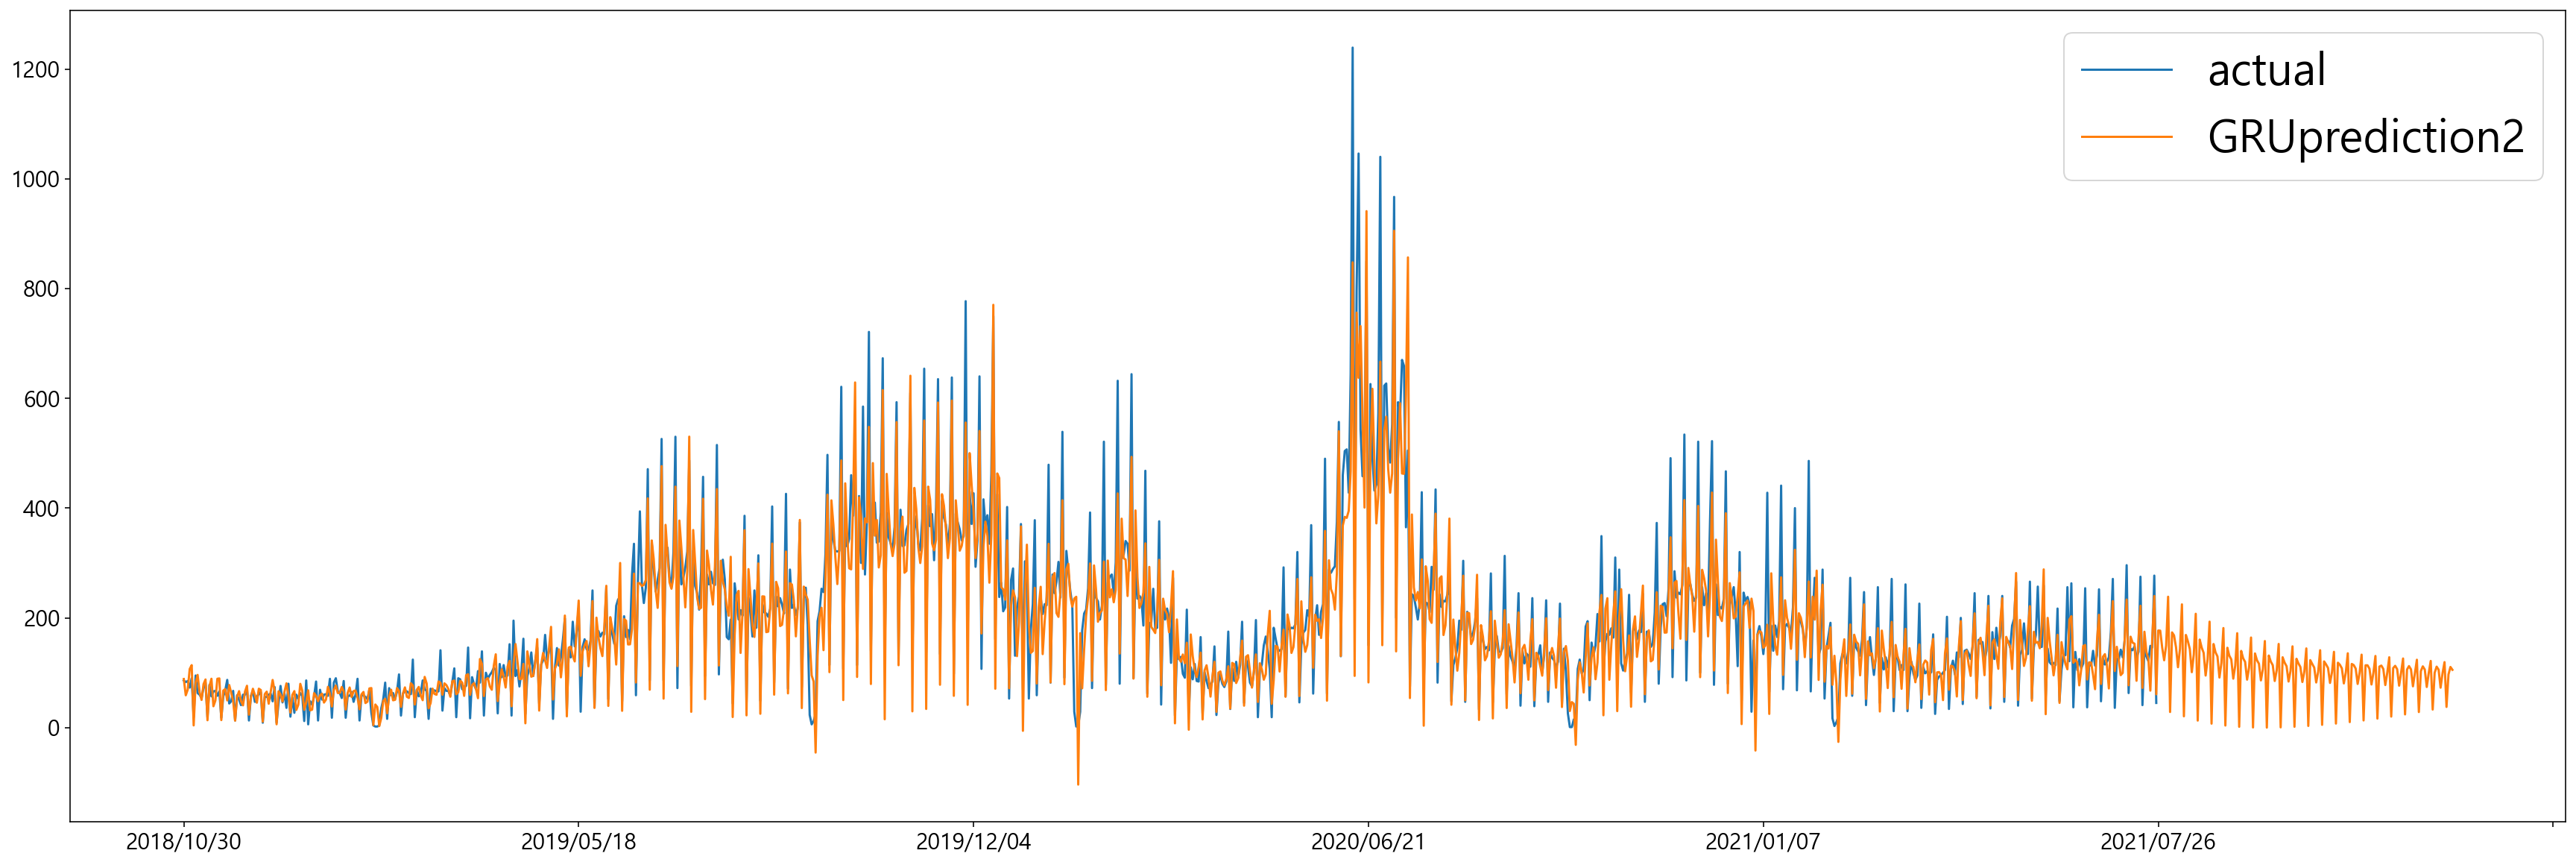

In [24]:
plt.figure(figsize=(30,10))
plt.plot(apart1_sum.iloc[-1000:].to_numpy(), label='actual')
#plt.plot(apart1_sum.iloc[-100:].to_numpy(), label='actual')
pred = model.predict(x_test)
ans=scaler.inverse_transform(pred).sum(axis=1)
#ans2=scaler.inverse_transform(pred).sum(axis=1)
x_pre=scaled_df[-40:].to_numpy().reshape(1,40,25)
#x_pre2=scaled_df[-40:].to_numpy().reshape(1,40,25)
for i in range(150):
    tempx=model.predict(x_pre)
    #tempx2=model2.predict(x_pre2)
    ans=np.append(ans,scaler.inverse_transform(tempx).sum())
    #ans2=np.append(ans2,scaler.inverse_transform(tempx2).sum())
    x_pre=np.append(x_pre.reshape(40,25),tempx, axis=0)
    #x_pre2=np.append(x_pre2.reshape(40,25),tempx2, axis=0)
    x_pre=np.delete(x_pre,0,axis=0)
    #x_pre2=np.delete(x_pre2,0,axis=0)
    x_pre=x_pre.reshape(1,40,25)
    #x_pre2=x_pre2.reshape(1,40,25)
plt.plot(ans, label='GRUprediction2')    
#plt.plot(ans[900:], label='GRUprediction')
#plt.plot(ans2[900:], label='GRUprediction2')
plt.legend(prop={'size':30})
ind=apart1_sum[-1000:].index
#plt.xticks([0,50,100,150,200,250],['900','950','1000','1050','1100','1150'],fontsize=15)
plt.xticks([0,200,400,600,800,1000,1200],["2018/10/30","2019/05/18","2019/12/04","2020/06/21","2021/01/07","2021/07/26",""],fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('data/GRU2거래량1.png')

In [ ]:
apart1_sum[-1000:].index

In [21]:
model=models.load_model('model/GRU - 038-val0.0027.h5') 